# Testing and Validation

This notebook validates the physics engine and solver using simple surfaces.

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

import numpy as np
import matplotlib.pyplot as plt
from surfaces import FlatSurface, Surface
from physics import PhysicsEngine
from utils import run_simulation, plot_trajectory, calculate_energy

## Test 1: Flat Surface (No Friction)
Energy should be conserved.

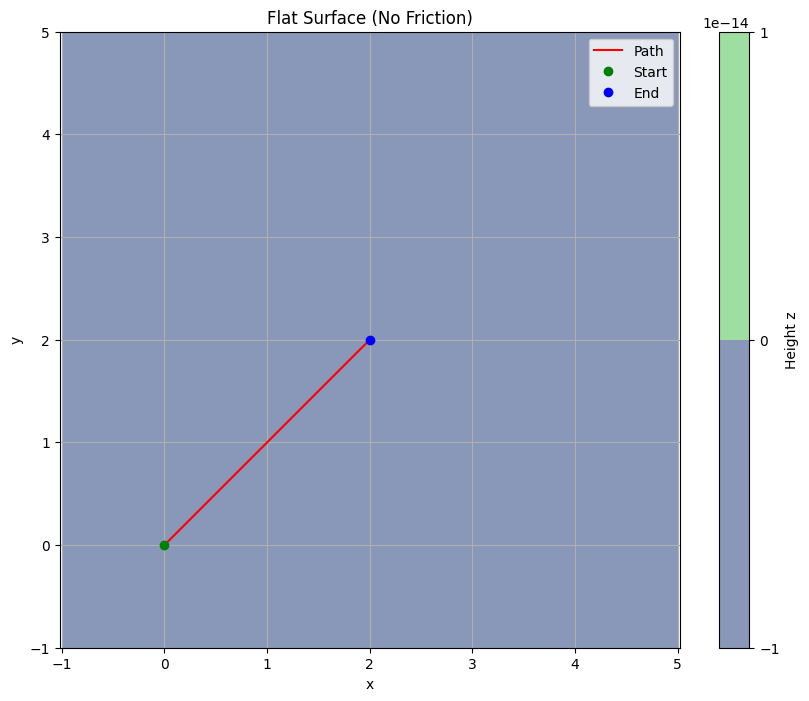

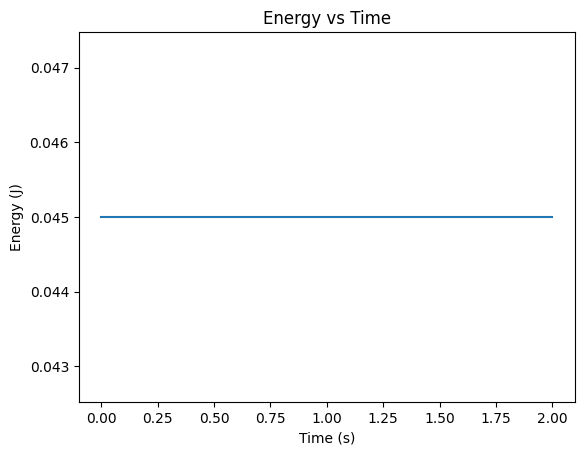

Energy variation: 0.0


In [2]:
flat_surface = FlatSurface()
physics = PhysicsEngine(flat_surface, mu=0.0)

initial_state = [0, 0, 1, 1] # x, y, vx, vy
t_span = [0, 2]

sol = run_simulation(physics, initial_state, t_span)

plot_trajectory(flat_surface, sol, title="Flat Surface (No Friction)")

energies = calculate_energy(physics, sol)
plt.plot(sol.t, energies)
plt.title("Energy vs Time")
plt.ylabel("Energy (J)")
plt.xlabel("Time (s)")
plt.show()

print(f"Energy variation: {np.max(energies) - np.min(energies)}")

## Test 2: Simple Bowl (Harmonic Oscillator)
z = 0.5 * (x^2 + y^2)

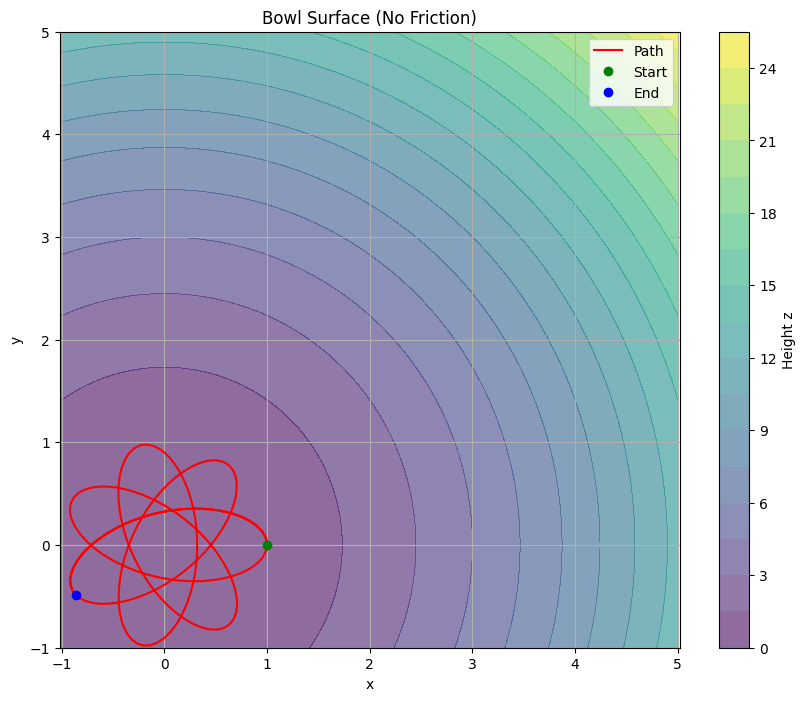

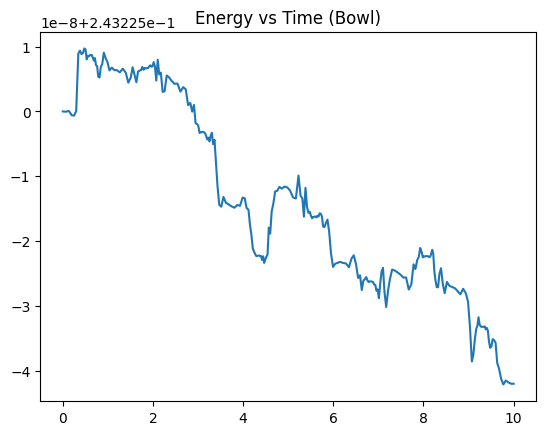

In [3]:
class BowlSurface(Surface):
    def height(self, x, y):
        return 0.5 * (x**2 + y**2)

bowl = BowlSurface()
physics_bowl = PhysicsEngine(bowl, mu=0.0)

initial_state = [1, 0, 0, 1]
t_span = [0, 10]

sol_bowl = run_simulation(physics_bowl, initial_state, t_span)

plot_trajectory(bowl, sol_bowl, title="Bowl Surface (No Friction)")

energies_bowl = calculate_energy(physics_bowl, sol_bowl)
plt.plot(sol_bowl.t, energies_bowl)
plt.title("Energy vs Time (Bowl)")
plt.show()